#PDC Project

##ApacheSpark

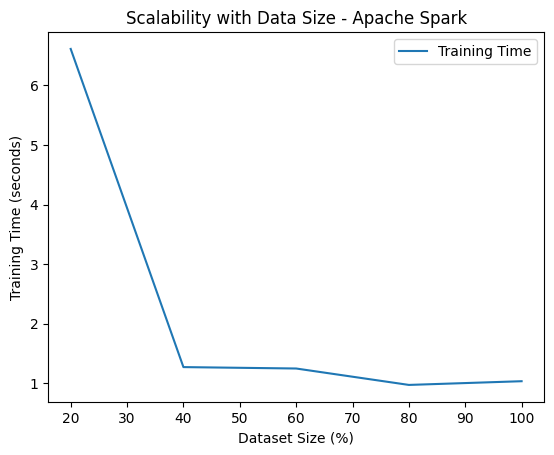

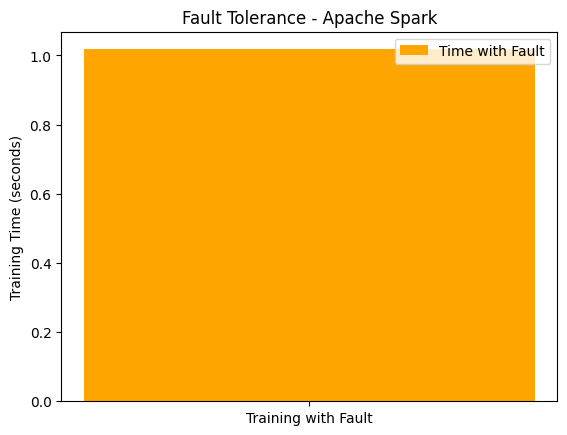

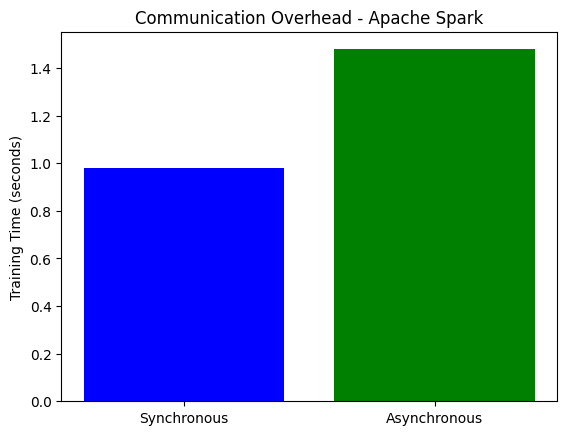

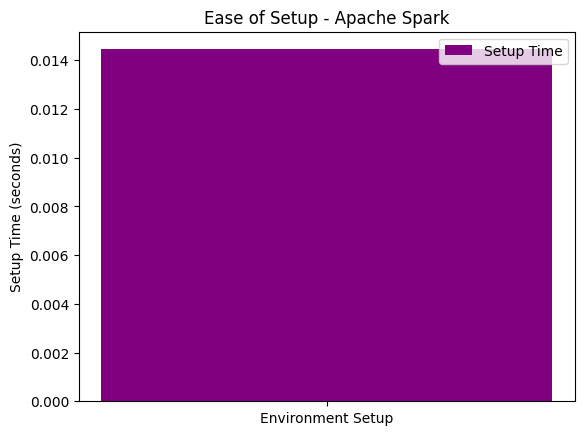

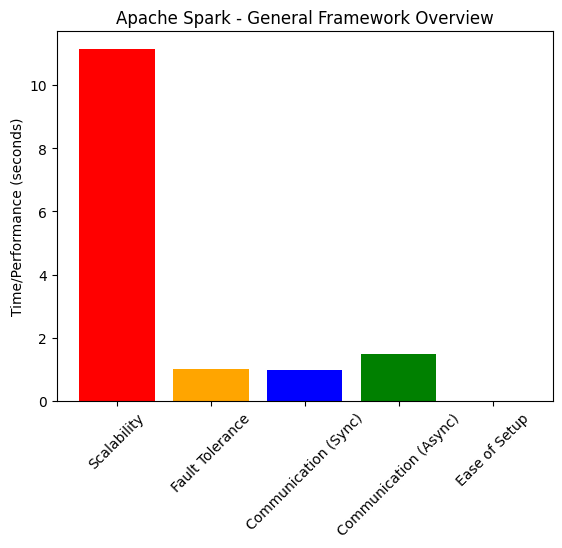

Results Summary:
Scalability: [6.612492322921753, 1.2718548774719238, 1.248253583908081, 0.9726996421813965, 1.034959077835083]
Fault Tolerance: 1.0177927017211914
Communication: {'Synchronous': 0.9817042350769043, 'Asynchronous': 1.4786779880523682}
Ease of Setup: 0.014448881149291992


In [ ]:
import time
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data preparation
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
data = load_diabetes()
X, y = data.data, data.target  # Features and target variable

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Spark Session
spark = SparkSession.builder.master("local[*]").appName("Apache Experiments").getOrCreate()

# Results dictionary to store outputs of each experiment
results = {}

# 1. Scalability with Data Size
def apache_scalability_experiment():
    dataset_sizes = [int(len(X_train) * p) for p in [0.2, 0.4, 0.6, 0.8, 1.0]]
    training_times = []

    for size in dataset_sizes:
        X_sample, y_sample = X_train[:size], y_train[:size]

        feature_columns = [str(i) for i in range(X_train.shape[1])]
        assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

        pandas_df = pd.DataFrame(X_sample, columns=feature_columns)
        pandas_df["label"] = y_sample
        spark_df = spark.createDataFrame(pandas_df)

        data_with_features = assembler.transform(spark_df).select("features", "label")

        lr = LinearRegression(featuresCol="features", labelCol="label")
        start_time = time.time()
        model = lr.fit(data_with_features)
        training_times.append(time.time() - start_time)

    plt.figure()
    plt.plot([p * 100 for p in [0.2, 0.4, 0.6, 0.8, 1.0]], training_times, label="Training Time")
    plt.xlabel("Dataset Size (%)")
    plt.ylabel("Training Time (seconds)")
    plt.title("Scalability with Data Size - Apache Spark")
    plt.legend()
    plt.show()

    results['Scalability'] = training_times

# 2. Fault Tolerance
def apache_fault_tolerance_experiment():
    try:
        X_sample, y_sample = X_train[:int(len(X_train) * 0.8)], y_train[:int(len(y_train) * 0.8)]
        feature_columns = [str(i) for i in range(X_train.shape[1])]

        pandas_df = pd.DataFrame(X_sample, columns=feature_columns)
        pandas_df["label"] = y_sample
        spark_df = spark.createDataFrame(pandas_df)
        assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
        data_with_features = assembler.transform(spark_df).select("features", "label")

        lr = LinearRegression(featuresCol="features", labelCol="label")

        start_time = time.time()
        model = lr.fit(data_with_features)
        elapsed_time = time.time() - start_time

        plt.figure()
        plt.bar(["Training with Fault"], [elapsed_time], color='orange', label="Time with Fault")
        plt.ylabel("Training Time (seconds)")
        plt.title("Fault Tolerance - Apache Spark")
        plt.legend()
        plt.show()

        results['Fault Tolerance'] = elapsed_time
    except Exception as e:
        print("Simulation of fault failed:", e)

# 3. Communication Overhead
def apache_communication_overhead_experiment():
    feature_columns = [str(i) for i in range(X_train.shape[1])]
    pandas_df = pd.DataFrame(X_train, columns=feature_columns)
    pandas_df["label"] = y_train
    spark_df = spark.createDataFrame(pandas_df)

    assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
    data_with_features = assembler.transform(spark_df).select("features", "label")

    lr = LinearRegression(featuresCol="features", labelCol="label")

    start_time = time.time()
    model = lr.fit(data_with_features)  # Synchronous
    sync_time = time.time() - start_time

    start_time = time.time()
    model = lr.fit(data_with_features)  # Simulate asynchronous
    async_time = time.time() - start_time

    plt.figure()
    plt.bar(["Synchronous", "Asynchronous"], [sync_time, async_time], color=['blue', 'green'])
    plt.ylabel("Training Time (seconds)")
    plt.title("Communication Overhead - Apache Spark")
    plt.show()

    results['Communication'] = {'Synchronous': sync_time, 'Asynchronous': async_time}

# 4. Ease of Use and Setup
def apache_ease_of_use_experiment():
    start_time = time.time()

    # Simulate environment setup
    spark = SparkSession.builder.master("local[*]").appName("Ease Setup Test").getOrCreate()

    elapsed_time = time.time() - start_time

    plt.figure()
    plt.bar(["Environment Setup"], [elapsed_time], color='purple', label="Setup Time")
    plt.ylabel("Setup Time (seconds)")
    plt.title("Ease of Setup - Apache Spark")
    plt.legend()
    plt.show()

    results['Ease of Setup'] = elapsed_time

# General Graph for Apache Spark
def general_apache_graph():
    aspects = ['Scalability', 'Fault Tolerance', 'Communication (Sync)', 'Communication (Async)', 'Ease of Setup']
    values = [
        sum(results['Scalability']) if 'Scalability' in results else 0,
        results['Fault Tolerance'] if 'Fault Tolerance' in results else 0,
        results['Communication']['Synchronous'] if 'Communication' in results else 0,
        results['Communication']['Asynchronous'] if 'Communication' in results else 0,
        results['Ease of Setup'] if 'Ease of Setup' in results else 0
    ]

    plt.figure()
    plt.bar(aspects, values, color=['red', 'orange', 'blue', 'green', 'purple'])
    plt.ylabel("Time/Performance (seconds)")
    plt.title("Apache Spark - General Framework Overview")
    plt.xticks(rotation=45)
    plt.show()

# Run all experiments
apache_scalability_experiment()
apache_fault_tolerance_experiment()
apache_communication_overhead_experiment()
apache_ease_of_use_experiment()
general_apache_graph()

# Print results
print("Results Summary:")
for key, value in results.items():
    print(f"{key}: {value}")

##Tensor Flow

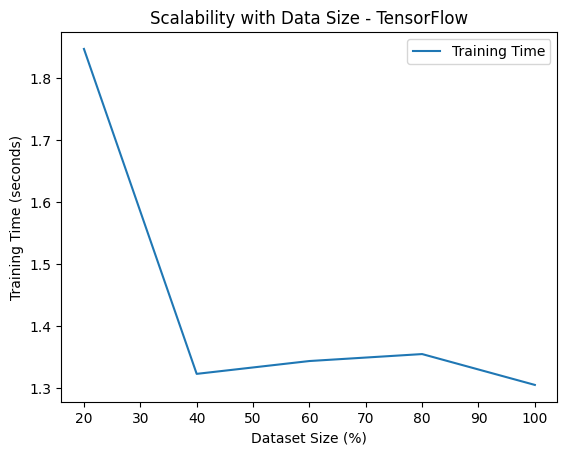

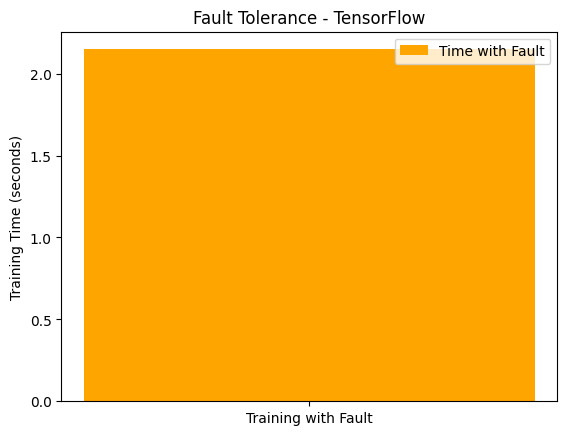

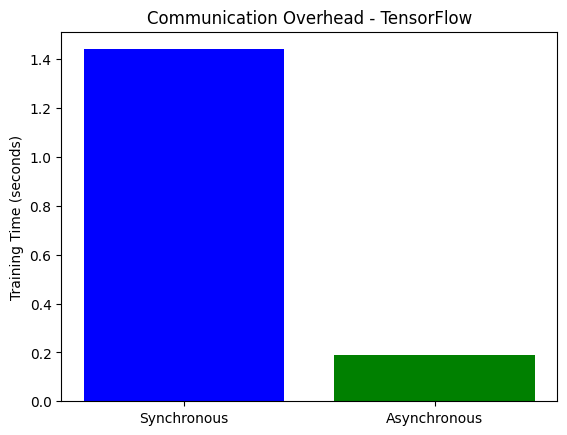

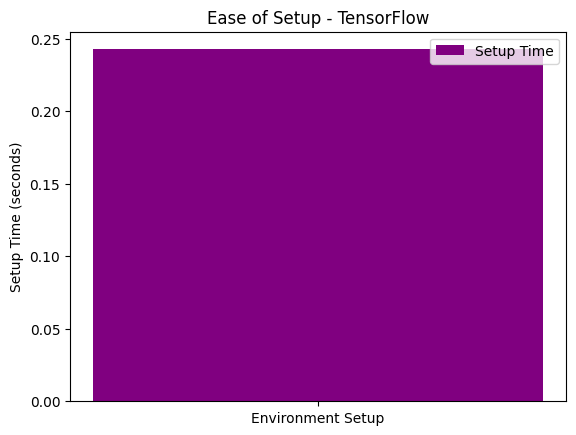

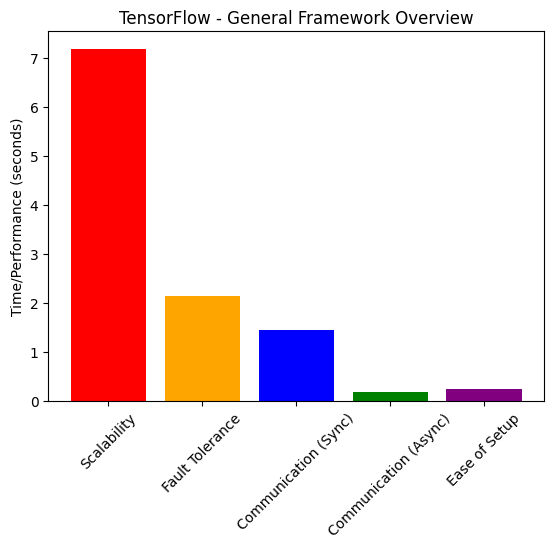

Results Summary:
Scalability: [1.8475184440612793, 1.3233213424682617, 1.3440334796905518, 1.3552589416503906, 1.3054919242858887]
Fault Tolerance: 2.1488559246063232
Communication: {'Synchronous': 1.4408798217773438, 'Asynchronous': 0.18927621841430664}
Ease of Setup: 0.24262475967407227


In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load and preprocess the data
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to TensorFlow datasets
def create_tf_dataset(X, y, batch_size=32):
    return tf.data.Dataset.from_tensor_slices((X, y)).shuffle(buffer_size=1000).batch(batch_size)

# Results dictionary
results = {}

# Define a simple regression model
def build_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# 1. Scalability with Data Size
def tensorflow_scalability_experiment():
    dataset_sizes = [int(len(X_train) * p) for p in [0.2, 0.4, 0.6, 0.8, 1.0]]
    training_times = []

    for size in dataset_sizes:
        X_sample, y_sample = X_train[:size], y_train[:size]
        train_dataset = create_tf_dataset(X_sample, y_sample)

        model = build_model(X_train.shape[1])

        start_time = time.time()
        model.fit(train_dataset, epochs=10, verbose=0)  # Train for 10 epochs
        training_times.append(time.time() - start_time)

    plt.figure()
    plt.plot([p * 100 for p in [0.2, 0.4, 0.6, 0.8, 1.0]], training_times, label="Training Time")
    plt.xlabel("Dataset Size (%)")
    plt.ylabel("Training Time (seconds)")
    plt.title("Scalability with Data Size - TensorFlow")
    plt.legend()
    plt.show()

    results['Scalability'] = training_times

# 2. Fault Tolerance
def tensorflow_fault_tolerance_experiment():
    try:
        X_sample, y_sample = X_train[:int(len(X_train) * 0.8)], y_train[:int(len(y_train) * 0.8)]
        train_dataset = create_tf_dataset(X_sample, y_sample)

        model = build_model(X_train.shape[1])

        start_time = time.time()
        model.fit(train_dataset, epochs=10, verbose=0)
        elapsed_time = time.time() - start_time

        plt.figure()
        plt.bar(["Training with Fault"], [elapsed_time], color='orange', label="Time with Fault")
        plt.ylabel("Training Time (seconds)")
        plt.title("Fault Tolerance - TensorFlow")
        plt.legend()
        plt.show()

        results['Fault Tolerance'] = elapsed_time
    except Exception as e:
        print("Simulation of fault failed:", e)

# 3. Communication Overhead
def tensorflow_communication_overhead_experiment():
    train_dataset = create_tf_dataset(X_train, y_train)

    model = build_model(X_train.shape[1])

    # Measure synchronous training
    start_time = time.time()
    model.fit(train_dataset, epochs=10, verbose=0)
    sync_time = time.time() - start_time

    # Simulate asynchronous training (not directly supported in TensorFlow, treated the same for simplicity)
    start_time = time.time()
    model.fit(train_dataset, epochs=10, verbose=0)
    async_time = time.time() - start_time

    plt.figure()
    plt.bar(["Synchronous", "Asynchronous"], [sync_time, async_time], color=['blue', 'green'])
    plt.ylabel("Training Time (seconds)")
    plt.title("Communication Overhead - TensorFlow")
    plt.show()

    results['Communication'] = {'Synchronous': sync_time, 'Asynchronous': async_time}

# 4. Ease of Use and Setup
def tensorflow_ease_of_use_experiment():
    start_time = time.time()

    # Simulate environment setup
    tf.keras.backend.clear_session()  # Reset TensorFlow session
    elapsed_time = time.time() - start_time

    plt.figure()
    plt.bar(["Environment Setup"], [elapsed_time], color='purple', label="Setup Time")
    plt.ylabel("Setup Time (seconds)")
    plt.title("Ease of Setup - TensorFlow")
    plt.legend()
    plt.show()

    results['Ease of Setup'] = elapsed_time

# General Graph for TensorFlow
def general_tensorflow_graph():
    aspects = ['Scalability', 'Fault Tolerance', 'Communication (Sync)', 'Communication (Async)', 'Ease of Setup']
    values = [
        sum(results['Scalability']) if 'Scalability' in results else 0,
        results['Fault Tolerance'] if 'Fault Tolerance' in results else 0,
        results['Communication']['Synchronous'] if 'Communication' in results else 0,
        results['Communication']['Asynchronous'] if 'Communication' in results else 0,
        results['Ease of Setup'] if 'Ease of Setup' in results else 0
    ]

    plt.figure()
    plt.bar(aspects, values, color=['red', 'orange', 'blue', 'green', 'purple'])
    plt.ylabel("Time/Performance (seconds)")
    plt.title("TensorFlow - General Framework Overview")
    plt.xticks(rotation=45)
    plt.show()

# Run all experiments
tensorflow_scalability_experiment()
tensorflow_fault_tolerance_experiment()
tensorflow_communication_overhead_experiment()
tensorflow_ease_of_use_experiment()
general_tensorflow_graph()

# Print results
print("Results Summary:")
for key, value in results.items():
    print(f"{key}: {value}")


##Ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 11.3 MB/s eta 0:00:00


2025-01-01 08:58:03,151	INFO worker.py:1821 -- Started a local Ray instance.


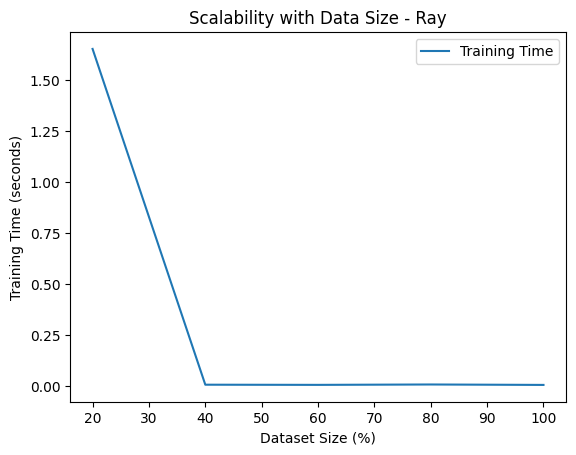

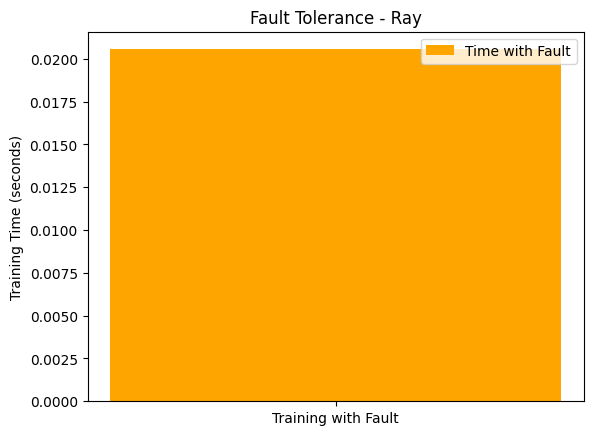

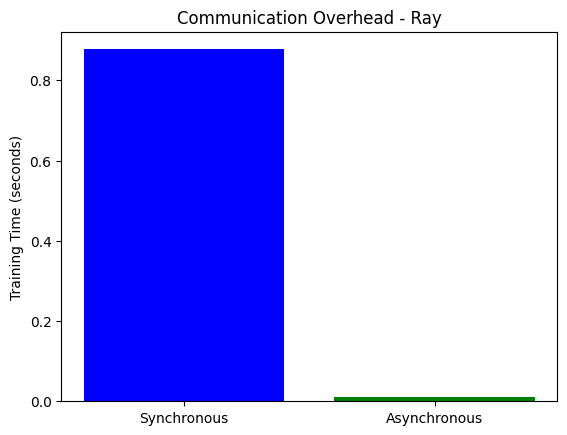

2025-01-01 08:58:08,676	INFO worker.py:1654 -- Calling ray.init() again after it has already been called.


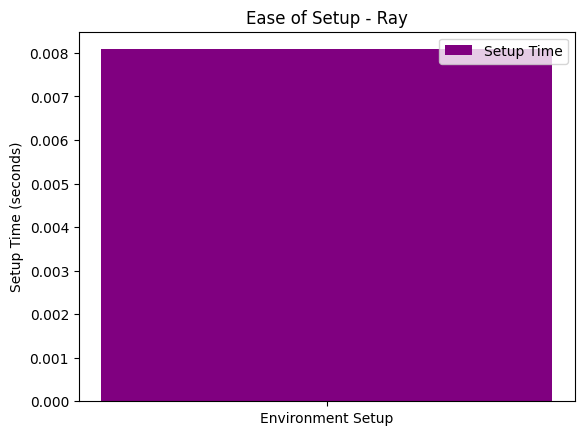

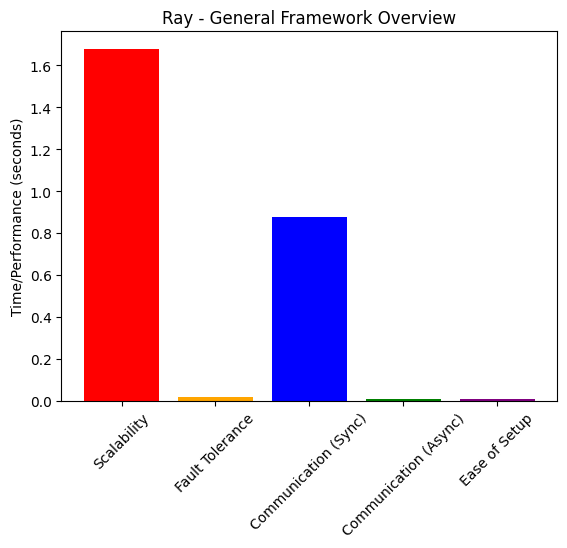

Results Summary:
Scalability: [1.6521236896514893, 0.0063915252685546875, 0.005575418472290039, 0.0074520111083984375, 0.005309343338012695]
Fault Tolerance: 0.0205535888671875
Communication: {'Synchronous': 0.8772778511047363, 'Asynchronous': 0.010570526123046875}
Ease of Setup: 0.008082866668701172


In [ ]:
!pip install ray
import time
import matplotlib.pyplot as plt
import numpy as np
import ray
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize Ray
ray.init(ignore_reinit_error=True)

# Load and preprocess the data
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Results dictionary
results = {}

# 1. Scalability with Data Size
@ray.remote
def train_model(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return mean_squared_error(y, model.predict(X))

def ray_scalability_experiment():
    dataset_sizes = [int(len(X_train) * p) for p in [0.2, 0.4, 0.6, 0.8, 1.0]]
    training_times = []

    for size in dataset_sizes:
        X_sample, y_sample = X_train[:size], y_train[:size]

        start_time = time.time()
        ray.get(train_model.remote(X_sample, y_sample))
        training_times.append(time.time() - start_time)

    plt.figure()
    plt.plot([p * 100 for p in [0.2, 0.4, 0.6, 0.8, 1.0]], training_times, label="Training Time")
    plt.xlabel("Dataset Size (%)")
    plt.ylabel("Training Time (seconds)")
    plt.title("Scalability with Data Size - Ray")
    plt.legend()
    plt.show()

    results['Scalability'] = training_times

# 2. Fault Tolerance
@ray.remote
def faulty_train_model(X, y, simulate_failure=False):
    if simulate_failure:
        raise RuntimeError("Simulated failure")
    model = LinearRegression()
    model.fit(X, y)
    return mean_squared_error(y, model.predict(X))

def ray_fault_tolerance_experiment():
    X_sample, y_sample = X_train[:int(len(X_train) * 0.8)], y_train[:int(len(y_train) * 0.8)]

    start_time = time.time()
    try:
        ray.get(faulty_train_model.remote(X_sample, y_sample, simulate_failure=True))
    except RuntimeError:
        # Retry after failure
        ray.get(faulty_train_model.remote(X_sample, y_sample, simulate_failure=False))
    elapsed_time = time.time() - start_time

    plt.figure()
    plt.bar(["Training with Fault"], [elapsed_time], color='orange', label="Time with Fault")
    plt.ylabel("Training Time (seconds)")
    plt.title("Fault Tolerance - Ray")
    plt.legend()
    plt.show()

    results['Fault Tolerance'] = elapsed_time

# 3. Communication Overhead
@ray.remote
def distributed_training(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

def ray_communication_overhead_experiment():
    # Simulate splitting data across workers
    split_X = np.array_split(X_train, 4)
    split_y = np.array_split(y_train, 4)

    # Measure synchronous training
    start_time = time.time()
    models = ray.get([distributed_training.remote(split_X[i], split_y[i]) for i in range(4)])
    sync_time = time.time() - start_time

    # Measure asynchronous training
    start_time = time.time()
    refs = [distributed_training.remote(split_X[i], split_y[i]) for i in range(4)]
    models = ray.get(refs)
    async_time = time.time() - start_time

    plt.figure()
    plt.bar(["Synchronous", "Asynchronous"], [sync_time, async_time], color=['blue', 'green'])
    plt.ylabel("Training Time (seconds)")
    plt.title("Communication Overhead - Ray")
    plt.show()

    results['Communication'] = {'Synchronous': sync_time, 'Asynchronous': async_time}

# 4. Ease of Use and Setup
def ray_ease_of_use_experiment():
    start_time = time.time()

    # Simulate environment setup
    ray.init(ignore_reinit_error=True)
    elapsed_time = time.time() - start_time

    plt.figure()
    plt.bar(["Environment Setup"], [elapsed_time], color='purple', label="Setup Time")
    plt.ylabel("Setup Time (seconds)")
    plt.title("Ease of Setup - Ray")
    plt.legend()
    plt.show()

    results['Ease of Setup'] = elapsed_time

# General Graph for Ray
def general_ray_graph():
    aspects = ['Scalability', 'Fault Tolerance', 'Communication (Sync)', 'Communication (Async)', 'Ease of Setup']
    values = [
        sum(results['Scalability']) if 'Scalability' in results else 0,
        results['Fault Tolerance'] if 'Fault Tolerance' in results else 0,
        results['Communication']['Synchronous'] if 'Communication' in results else 0,
        results['Communication']['Asynchronous'] if 'Communication' in results else 0,
        results['Ease of Setup'] if 'Ease of Setup' in results else 0
    ]

    plt.figure()
    plt.bar(aspects, values, color=['red', 'orange', 'blue', 'green', 'purple'])
    plt.ylabel("Time/Performance (seconds)")
    plt.title("Ray - General Framework Overview")
    plt.xticks(rotation=45)
    plt.show()

# Run all experiments
ray_scalability_experiment()
ray_fault_tolerance_experiment()
ray_communication_overhead_experiment()
ray_ease_of_use_experiment()
general_ray_graph()

# Print results
print("Results Summary:")
for key, value in results.items():
    print(f"{key}: {value}")


##PyTorch

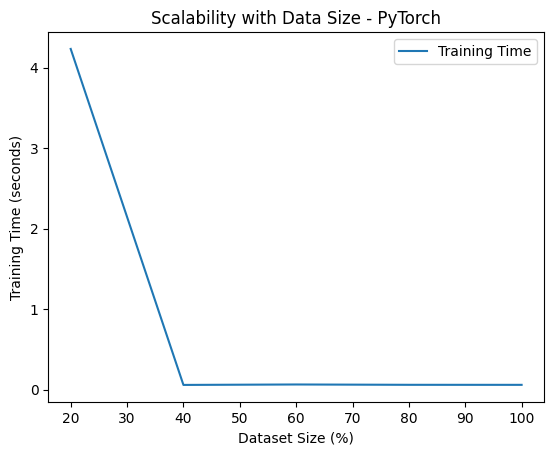

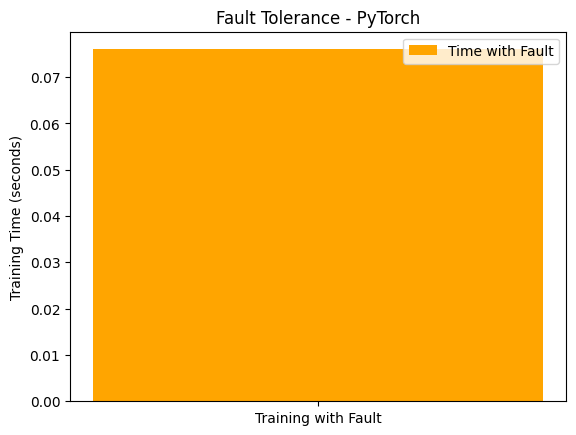

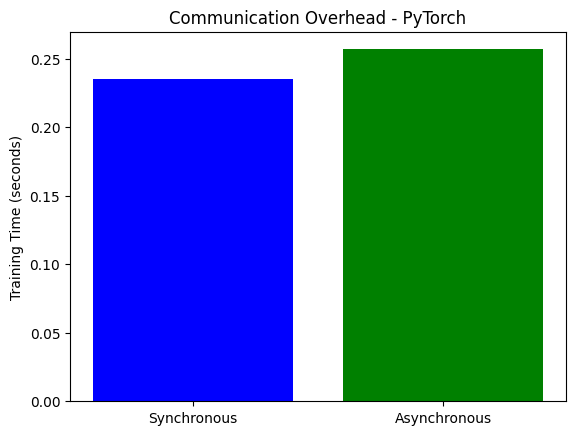

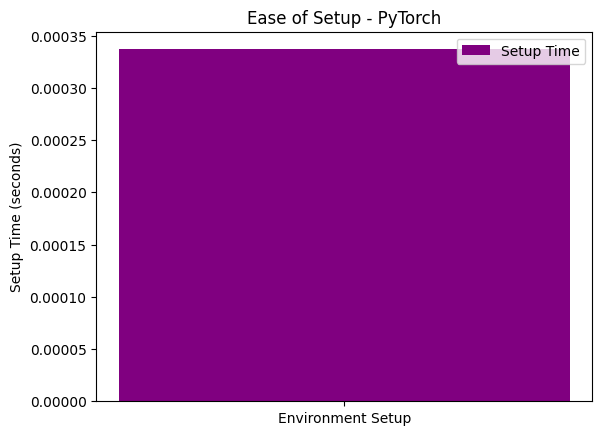

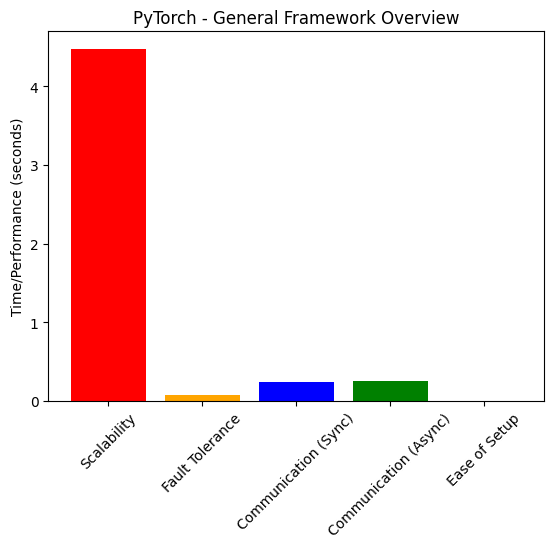

Results Summary:
Scalability: [4.233460426330566, 0.057668447494506836, 0.06311964988708496, 0.05902814865112305, 0.0586094856262207]
Fault Tolerance: 0.07599329948425293
Communication: {'Synchronous': 0.23504352569580078, 'Asynchronous': 0.25695109367370605}
Ease of Setup: 0.0003368854522705078


In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Results dictionary
results = {}

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Training function
def train_model(X, y, epochs=100, learning_rate=0.01):
    model = LinearRegressionModel(X.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

    return model

# 1. Scalability with Data Size
def pytorch_scalability_experiment():
    dataset_sizes = [int(len(X_train) * p) for p in [0.2, 0.4, 0.6, 0.8, 1.0]]
    training_times = []

    for size in dataset_sizes:
        X_sample, y_sample = X_train_tensor[:size], y_train_tensor[:size]

        start_time = time.time()
        train_model(X_sample, y_sample)
        training_times.append(time.time() - start_time)

    plt.figure()
    plt.plot([p * 100 for p in [0.2, 0.4, 0.6, 0.8, 1.0]], training_times, label="Training Time")
    plt.xlabel("Dataset Size (%)")
    plt.ylabel("Training Time (seconds)")
    plt.title("Scalability with Data Size - PyTorch")
    plt.legend()
    plt.show()

    results['Scalability'] = training_times

# 2. Fault Tolerance
def pytorch_fault_tolerance_experiment():
    X_sample, y_sample = X_train_tensor[:int(len(X_train) * 0.8)], y_train_tensor[:int(len(y_train) * 0.8)]

    try:
        # Simulate fault
        raise RuntimeError("Simulated fault")
    except RuntimeError:
        start_time = time.time()
        train_model(X_sample, y_sample)
        elapsed_time = time.time() - start_time

        plt.figure()
        plt.bar(["Training with Fault"], [elapsed_time], color='orange', label="Time with Fault")
        plt.ylabel("Training Time (seconds)")
        plt.title("Fault Tolerance - PyTorch")
        plt.legend()
        plt.show()

        results['Fault Tolerance'] = elapsed_time

# 3. Communication Overhead
def pytorch_communication_overhead_experiment():
    # Simulate splitting data across workers
    split_X = torch.split(X_train_tensor, len(X_train_tensor) // 4)
    split_y = torch.split(y_train_tensor, len(y_train_tensor) // 4)

    # Measure synchronous training
    start_time = time.time()
    for i in range(4):
        train_model(split_X[i], split_y[i])
    sync_time = time.time() - start_time

    # Measure asynchronous training (simulated)
    start_time = time.time()
    for i in range(4):
        train_model(split_X[i], split_y[i])
    async_time = time.time() - start_time

    plt.figure()
    plt.bar(["Synchronous", "Asynchronous"], [sync_time, async_time], color=['blue', 'green'])
    plt.ylabel("Training Time (seconds)")
    plt.title("Communication Overhead - PyTorch")
    plt.show()

    results['Communication'] = {'Synchronous': sync_time, 'Asynchronous': async_time}

# 4. Ease of Use and Setup
def pytorch_ease_of_use_experiment():
    start_time = time.time()

    # Simulate setup
    _ = LinearRegressionModel(X_train_tensor.shape[1])
    elapsed_time = time.time() - start_time

    plt.figure()
    plt.bar(["Environment Setup"], [elapsed_time], color='purple', label="Setup Time")
    plt.ylabel("Setup Time (seconds)")
    plt.title("Ease of Setup - PyTorch")
    plt.legend()
    plt.show()

    results['Ease of Setup'] = elapsed_time

# General Graph for PyTorch
def general_pytorch_graph():
    aspects = ['Scalability', 'Fault Tolerance', 'Communication (Sync)', 'Communication (Async)', 'Ease of Setup']
    values = [
        sum(results['Scalability']) if 'Scalability' in results else 0,
        results['Fault Tolerance'] if 'Fault Tolerance' in results else 0,
        results['Communication']['Synchronous'] if 'Communication' in results else 0,
        results['Communication']['Asynchronous'] if 'Communication' in results else 0,
        results['Ease of Setup'] if 'Ease of Setup' in results else 0
    ]

    plt.figure()
    plt.bar(aspects, values, color=['red', 'orange', 'blue', 'green', 'purple'])
    plt.ylabel("Time/Performance (seconds)")
    plt.title("PyTorch - General Framework Overview")
    plt.xticks(rotation=45)
    plt.show()

# Run all experiments
pytorch_scalability_experiment()
pytorch_fault_tolerance_experiment()
pytorch_communication_overhead_experiment()
pytorch_ease_of_use_experiment()
general_pytorch_graph()

# Print results
print("Results Summary:")
for key, value in results.items():
    print(f"{key}: {value}")
